In [ ]:
# XGBoost Model

Class distribution in training set: Counter({0: 800, 5: 800, 1: 800, 4: 800, 2: 800, 3: 800})
Class distribution in validation set: Counter({2: 100, 3: 100, 0: 100, 5: 100, 4: 100, 1: 100})
Class distribution in test set: Counter({2: 100, 4: 100, 3: 100, 5: 100, 0: 100, 1: 100})


E:\python\lib\site-packages\xgboost\core.py:158: UserWarning: [21:50:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 71.83%


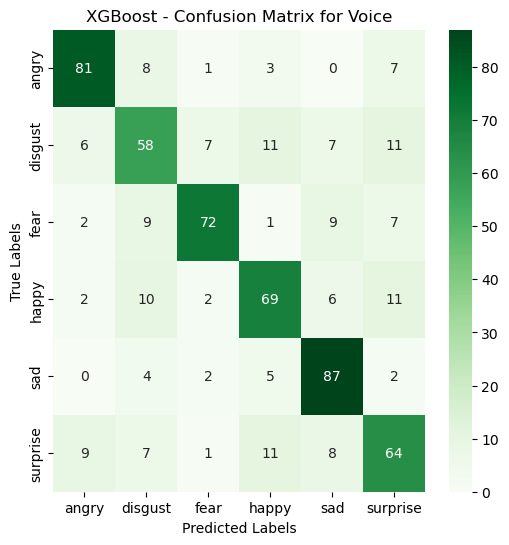

Classification Report:
              precision    recall  f1-score   support

       angry       0.81      0.81      0.81       100
     disgust       0.60      0.58      0.59       100
        fear       0.85      0.72      0.78       100
       happy       0.69      0.69      0.69       100
         sad       0.74      0.87      0.80       100
    surprise       0.63      0.64      0.63       100

    accuracy                           0.72       600
   macro avg       0.72      0.72      0.72       600
weighted avg       0.72      0.72      0.72       600



In [1]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Load pre-extracted features and labels
features = np.load('F:/MS Thesis/Research/Data/features.npy')
labels = np.load('F:/MS Thesis/Research/Data/labels.npy')

# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Stratified splitting to maintain class balance
X_train, X_temp, y_train, y_temp = train_test_split(
    features, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Display class distribution
print("Class distribution in training set:", Counter(y_train))
print("Class distribution in validation set:", Counter(y_val))
print("Class distribution in test set:", Counter(y_test))

# Convert the data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': len(label_encoder.classes_),
    'eval_metric': 'mlogloss',     # Evaluation metric for multi-class classification
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'colsample_bytree': 0.7,
    'subsample': 0.8
}

# Set the evaluation list for early stopping
evals = [(dtrain, 'train'), (dval, 'eval')]

# Train the model with early stopping and without verbose output
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,  # Stop if no improvement in 10 rounds
    verbose_eval=False  # Prevent printing the training log
)

# Predict on the test set
y_pred = model.predict(dtest)

# Convert predictions to integer labels
y_pred = y_pred.astype(int)

# Evaluate accuracy
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with light green color
plt.figure(figsize=(6, 6))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Greens',  # Change colormap to 'Greens'
    xticklabels=label_encoder.classes_, 
    yticklabels=label_encoder.classes_
)
plt.title("XGBoost - Confusion Matrix for Voice")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


In [ ]:
# Random Forest model

Test Accuracy: 55.33%


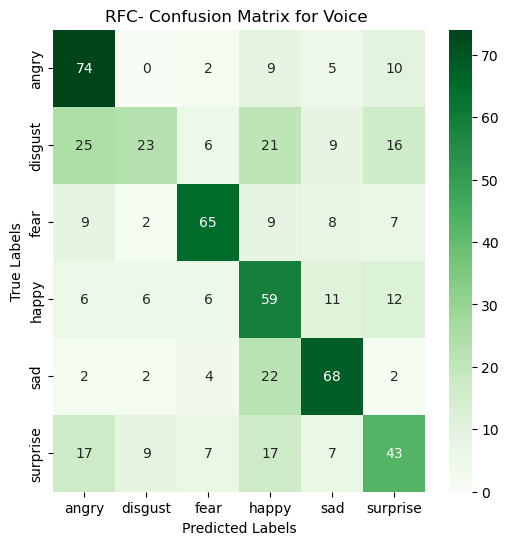

Classification Report:
              precision    recall  f1-score   support

       angry       0.56      0.74      0.64       100
     disgust       0.55      0.23      0.32       100
        fear       0.72      0.65      0.68       100
       happy       0.43      0.59      0.50       100
         sad       0.63      0.68      0.65       100
    surprise       0.48      0.43      0.45       100

    accuracy                           0.55       600
   macro avg       0.56      0.55      0.54       600
weighted avg       0.56      0.55      0.54       600



In [2]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load pre-extracted features and labels
features = np.load('F:/MS Thesis/Research/Data/features.npy')
labels = np.load('F:/MS Thesis/Research/Data/labels.npy')

# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the dataset into train, validation, and test sets with stratification
X_train, X_temp, y_train, y_temp = train_test_split(features, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize the Random Forest model
model = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=6,             # Maximum depth of trees
    random_state=42,         # Seed for reproducibility
    n_jobs=-1,               # Use all available processors
    class_weight='balanced'  # Handle imbalanced classes
)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with light green color
plt.figure(figsize=(6, 6))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Greens',  # Change colormap to 'Greens'
    xticklabels=label_encoder.classes_, 
    yticklabels=label_encoder.classes_
)
plt.title("RFC- Confusion Matrix for Voice ")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


In [ ]:
# Bi-LSTM Model

Shape of X before reshaping: (6000, 13)
New shape of X after reshaping: (6000, 1, 13)
Label mapping: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5}


E:\python\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.2499 - loss: 1.7197 - val_accuracy: 0.4483 - val_loss: 1.4751
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4076 - loss: 1.4597 - val_accuracy: 0.3883 - val_loss: 1.4691
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4406 - loss: 1.4018 - val_accuracy: 0.4233 - val_loss: 1.3914
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4508 - loss: 1.3604 - val_accuracy: 0.4450 - val_loss: 1.3281
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4730 - loss: 1.3110 - val_accuracy: 0.4817 - val_loss: 1.2943
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4995 - loss: 1.2626 - val_accuracy: 0.5100 - val_loss: 1.2397
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4963 - loss: 1.2569 - val_accuracy: 0.4950 - val_loss: 1.2815
Epoch 8/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4866 - loss: 1.2644 - val_accurac

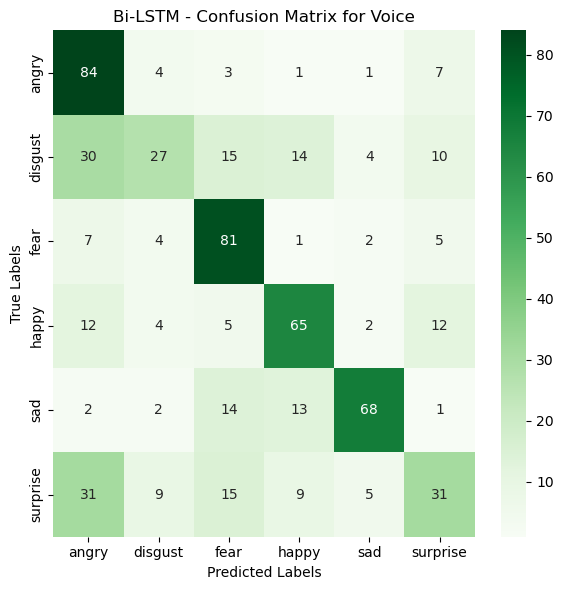

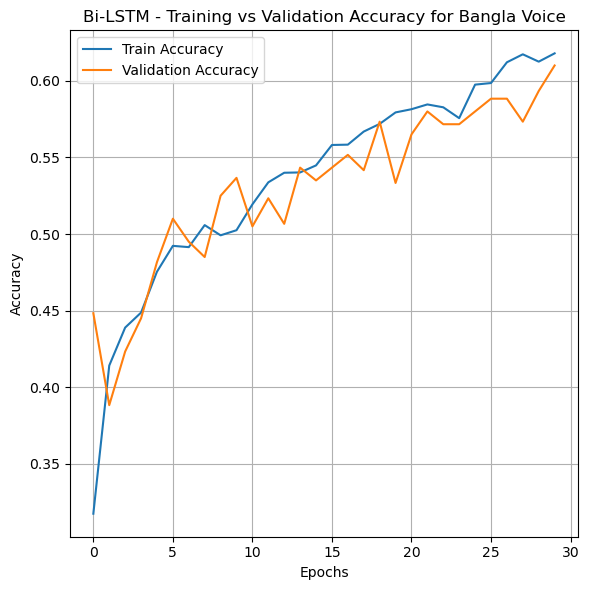

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import seaborn as sns

# Load the feature and label data
X = np.load('F:/MS Thesis/Research/Data/features.npy')  # Adjust path if needed
y = np.load('F:/MS Thesis/Research/Data/labels.npy')  # Adjust path if needed

# Check the shape of X to understand its dimensions
print("Shape of X before reshaping:", X.shape)

# Reshape X if needed (adding a time step dimension)
if len(X.shape) == 2:
    X = X.reshape((X.shape[0], 1, X.shape[1]))  # (samples, 1, features)
    print("New shape of X after reshaping:", X.shape)

# Label mapping (string to integer)
label_map = {label: idx for idx, label in enumerate(np.unique(y))}
print("Label mapping:", label_map)

# Convert labels to integers
y = np.array([label_map[label] for label in y])

# Train, Validation, Test Split (80-10-10)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# Bi-LSTM Model
model = models.Sequential([
    layers.Bidirectional(layers.LSTM(128, return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(64, activation='relu'),
    layers.Dense(y_train.shape[1], activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model (epochs = 30)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(label_map.keys())))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix (Separate Figure Size)
plt.figure(figsize=(6, 6))  # Confusion Matrix Figure Size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=list(label_map.keys()), 
            yticklabels=list(label_map.keys()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Bi-LSTM - Confusion Matrix for Voice')
plt.tight_layout()
plt.show()

# Accuracy Curve (Separate Figure Size)
plt.figure(figsize=(6, 6))  # Accuracy Curve Figure Size
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Bi-LSTM - Training vs Validation Accuracy for Bangla Voice')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




In [ ]:
# CNN Model

In [ ]:
# CNN+Bi-LSTM Model

Shape of X before reshaping: (6000, 13)
New shape of X after reshaping: (6000, 13, 1)
Label mapping: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5}


E:\python\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.2155 - loss: 1.7668 - val_accuracy: 0.3217 - val_loss: 1.6421
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3665 - loss: 1.5178 - val_accuracy: 0.4517 - val_loss: 1.3722
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4419 - loss: 1.3722 - val_accuracy: 0.4733 - val_loss: 1.3542
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4724 - loss: 1.3096 - val_accuracy: 0.4717 - val_loss: 1.2958
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5039 - loss: 1.2457 - val_accuracy: 0.5133 - val_loss: 1.1982
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5464 - loss: 1.1728 - val_accuracy: 0.5450 - val_loss: 1.1465
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5341 - loss: 1.1816 - val_accuracy: 0.5450 - val_loss: 1.1580
Epoch 8/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5680 - loss: 1.0984 - val_acc

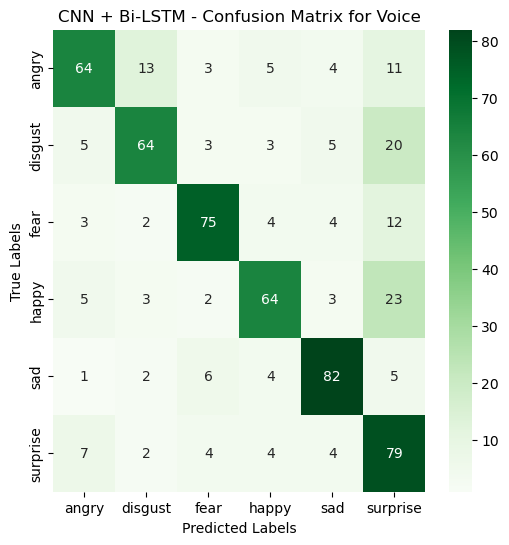

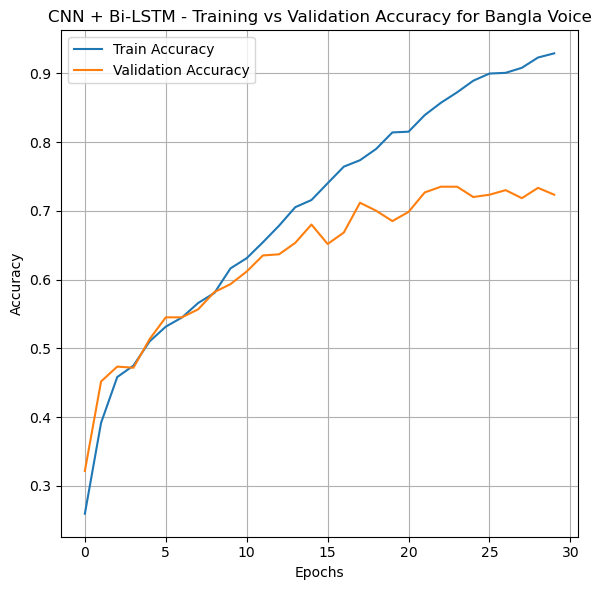

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import seaborn as sns

# Load the feature and label data
X = np.load('F:/MS Thesis/Research/Data/features.npy')  # Adjust the path if needed
y = np.load('F:/MS Thesis/Research/Data/labels.npy')  # Adjust the path if needed

# Check the shape of X to understand its dimensions
print("Shape of X before reshaping:", X.shape)

# If X has only 2 dimensions, reshape it accordingly
if len(X.shape) == 2:
    X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for CNN input (samples, features, channels)
    print("New shape of X after reshaping:", X.shape)

# Create a mapping from labels (strings) to integers
label_map = {label: idx for idx, label in enumerate(np.unique(y))}
print("Label mapping:", label_map)

# Convert string labels to integers
y = np.array([label_map[label] for label in y])

# Split the data into train, validation, and test sets (80% training, 10% validation, 10% testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# Build the CNN + Bi-LSTM hybrid model
model = models.Sequential([
    # 1D CNN Layer for feature extraction
    layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.MaxPooling1D(pool_size=2),
    
    # 1D CNN Layer (additional)
    layers.Conv1D(128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    # Bi-LSTM Layer for temporal modeling
    layers.Bidirectional(layers.LSTM(128, return_sequences=False)),

    # Fully connected layer
    layers.Dense(64, activation='relu'),
    
    # Output layer with softmax activation
    layers.Dense(y_train.shape[1], activation='softmax')  # y_train.shape[1] is the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(label_map.keys())))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=list(label_map.keys()), yticklabels=list(label_map.keys()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('CNN + Bi-LSTM - Confusion Matrix for Voice')
plt.show()

# Plot Accuracy Curve
plt.figure(figsize=(6, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN + Bi-LSTM - Training vs Validation Accuracy for Bangla Voice')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


E:\python\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.1969 - loss: 3.1868 - val_accuracy: 0.2600 - val_loss: 1.7144
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2838 - loss: 1.7041 - val_accuracy: 0.3233 - val_loss: 1.6581
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3220 - loss: 1.6318 - val_accuracy: 0.3900 - val_loss: 1.5694
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3442 - loss: 1.5917 - val_accuracy: 0.3933 - val_loss: 1.5340
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3747 - loss: 1.5087 - val_accuracy: 0.4650 - val_loss: 1.3994
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4276 - loss: 1.4253 - val_accuracy: 0.4050 - val_loss: 1.4814
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4406 - loss: 1.3923 - val_accuracy: 0.4517 - val_loss: 1.3456
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4406 - loss: 1.3817 - val_accu

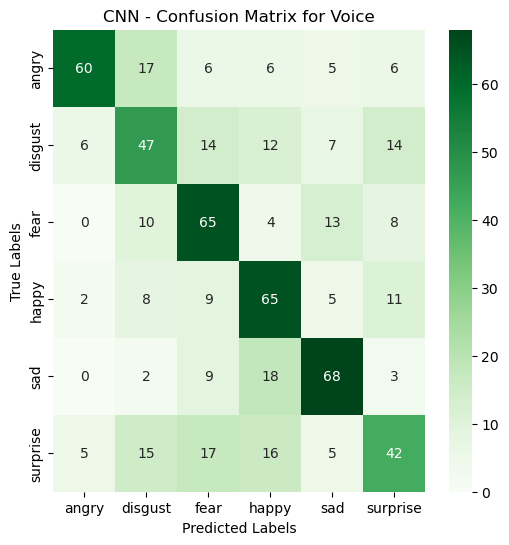

Classification Report:
              precision    recall  f1-score   support

       angry       0.82      0.60      0.69       100
     disgust       0.47      0.47      0.47       100
        fear       0.54      0.65      0.59       100
       happy       0.54      0.65      0.59       100
         sad       0.66      0.68      0.67       100
    surprise       0.50      0.42      0.46       100

    accuracy                           0.58       600
   macro avg       0.59      0.58      0.58       600
weighted avg       0.59      0.58      0.58       600



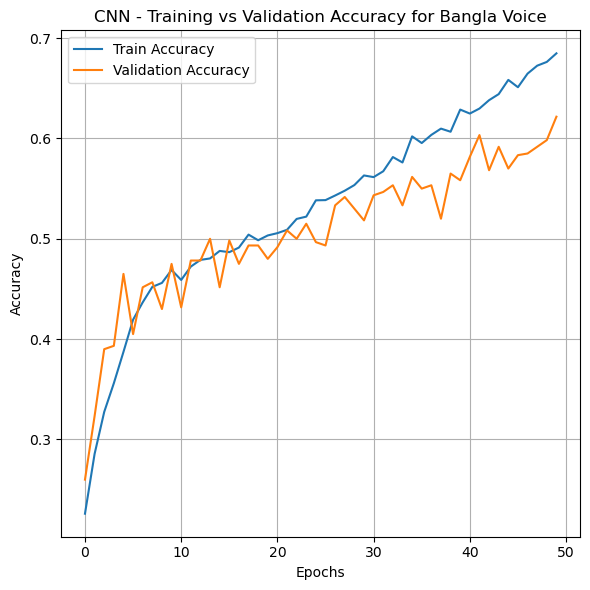

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load pre-extracted MFCC features and labels
features = np.load('F:/MS Thesis/Research/Data/features.npy')
labels = np.load('F:/MS Thesis/Research/Data/labels.npy')

# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the dataset into train, validation, and test sets with stratification
X_train, X_temp, y_train, y_temp = train_test_split(features, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Reshape the input data for 1D CNN (add a channel dimension)
X_train = X_train[..., np.newaxis]  # Add channel dimension (shape: (samples, timesteps, features, 1))
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Define the 1D CNN model
model = models.Sequential([
    layers.Conv1D(64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),  # Use kernel_size=1 for your current data shape
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(128, kernel_size=1, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(256, kernel_size=1, activation='relu'),
    layers.GlobalAveragePooling1D(),  # Use global average pooling instead of flatten
    layers.Dense(256, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Evaluate accuracy
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("CNN - Confusion Matrix for Voice")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Accuracy Curve (Separate Figure Size)
plt.figure(figsize=(6, 6))  # Accuracy Curve Figure Size
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN - Training vs Validation Accuracy for Bangla Voice')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
